# Quickstart Guide

Congratulations on successfully installing Sequenzo! 🎉 You're now ready to explore social sequence analysis with ease.

In this guide, we'll walk you through analyzing country-level CO₂ emissions sequences step by step. If you're curious about how we transformed the original dataset into a format suitable for sequence analysis, you can find the detailed explanation [here](https://sequenzo.yuqi-liang.tech/en/datasets/CO2-emissions).

New to Python? No worries! We've designed Sequenzo to be intuitive and beginner-friendly, so you can jump right in regardless of whether you are a newbie or a seasoned Python coder. 

By the end of this tutorial, you'll learn how to:

1. Install Sequenzo
2. Load and explore a dataset
3. Analyze social sequences
4. Visualize the results

Now, let's get started on this exciting journey! 🐍✨


## 1. Get a rough idea of the data

In [1]:
# Import necessary libraries
# Your calling code (e.g., in a script or notebook)

from sequenzo import * # Import the package, give it a short alias
import pandas as pd # Data manipulation

# List all the available datasets in Sequenzo
# Now access functions using the alias:
print('Available datasets in Sequenzo: ', list_datasets())

# Load the data that we would like to explore in this tutorial
# `df` is the short for `dataframe`, which is a common variable name for a dataset
# df = load_dataset('country_co2_emissions')
df = load_dataset('country_co2_emissions_global_deciles')

# Show the dataframe
df

Available datasets in Sequenzo:  ['country_co2_emissions_local_quintiles', 'country_co2_emissions_local_deciles', 'polyadic_seqc1', 'polyadic_samplep1', 'mvad', 'chinese_colonial_territories', 'polyadic_samplec1', 'country_gdp_per_capita', 'polyadic_seqp1', 'country_co2_emissions', 'biofam_married_domain', 'country_co2_emissions_global_deciles', 'country_co2_emissions_global_quintiles', 'biofam', 'pairfam_family', 'biofam_left_domain', 'biofam_child_domain']


,Unnamed: 0,country,1800,1801,1802,1803,1804,1805,1806,1807,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0,Afghanistan,D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),...,D7,D7,D7,D7,D7,D7,D7,D7,D7,D7
1,1,Albania,D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),...,D9,D9,D9,D9,D9,D9,D9,D9,D9,D9
2,2,Algeria,D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),...,D9,D9,D9,D9,D9,D9,D9,D9,D9,D9
3,3,Andorra,D7,D7,D7,D7,D7,D7,D7,D7,...,D10 (Very High),D10 (Very High),D10 (Very High),D10 (Very High),D10 (Very High),D10 (Very High),D10 (Very High),D10 (Very High),D10 (Very High),D10 (Very High)
4,4,Angola,D3,D3,D3,D3,D3,D3,D3,D3,...,D8,D8,D8,D8,D8,D8,D8,D8,D8,D8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,189,Venezuela,D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),...,D9,D9,D9,D9,D9,D8,D6,D8,D8,D8
190,190,Vietnam,D3,D3,D3,D3,D3,D3,D3,D3,...,D8,D8,D8,D8,D8,D9,D9,D9,D9,D9
191,191,Yemen,D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),...,D8,D8,D7,D7,D7,D7,D7,D7,D7,D7
192,192,Zambia,D7,D7,D7,D7,D7,D7,D7,D7,...,D7,D7,D7,D7,D7,D7,D7,D7,D7,D7


The classification is based on all years' CO₂ per capita values:

* Very Low (Bottom 20%)
* Low (20-40%)
* Middle (40-60%)
* High (60-80%)
* Very High (Top 20%)

Using a jorgan in social sequence analysis, each category is called a **state**, and the sequence of states is called a social sequence. In sum, the dataset shows the level of the CO₂ emissions per capita of each country in each year. 

If we take Andorra as an example:  

In [2]:
# Filter the data for Andorra
andorra_df = df[df['country'] == 'Andorra']

# Show the Andorra df
andorra_df

,Unnamed: 0,country,1800,1801,1802,1803,1804,1805,1806,1807,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
3,3,Andorra,D7,D7,D7,D7,D7,D7,D7,D7,...,D10 (Very High),D10 (Very High),D10 (Very High),D10 (Very High),D10 (Very High),D10 (Very High),D10 (Very High),D10 (Very High),D10 (Very High),D10 (Very High)


Based on the outcome, which is a subset of the original dataset, we can see that Andorra's CO₂ emissions per capita have undergone the following changes over the years:

* 1990-1991: Started at "Very High" levels, indicating emissions in the top 20% of all countries
* 1992-1997: Dropped to "High" level (60-80th percentile)
* 1998: Brief return to "Very High" level
* 2000s onwards: Stabilized at "High" level (60-80th percentile) and maintained this classification through 2019

But it comes with a question: What if we want to analyze the sequences of all countries? 🤔 

Here we need Sequenzo to help us!

## 2. Analyze Social Sequences with Sequenzo

In [ ]:
# Create a SequenceData object

# Define the time-span variable
time_list = list(df.columns)[1:]

# states = ['Very Low', 'Low', 'Middle', 'High', 'Very High']
states = ['D1 (Very Low)', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10 (Very High)']

# TODO: write a try and error: if no such a parameter, then ask to pass the right ones
# sequence_data = SequenceData(df, time=time, id_col="country", ids=df['country'].values, states=states)

sequence_data = SequenceData(df, 
                             time=time_list, 
                             id_col="country", 
                             states=states,
                             labels=states)

sequence_data

[!] Detected missing values (empty cells) in the sequence data.
    → Automatically added 'Missing' to `states` and `labels` for compatibility.
    However, it's strongly recommended to manually include it when defining `states` and `labels`.
    For example:

        states = ['At Home', 'Left Home', 'Missing']
        labels = ['At Home', 'Left Home', 'Missing']

    This ensures consistent color mapping and avoids unexpected visualization errors.

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 194
[>] Number of time points: 224
[>] Min/Max sequence length: 216 / 223
[>] There are 201 missing values across 194 sequences.
    First few missing sequence IDs: ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria'] ...
[>] Top sequences with the most missing time points:
    (Each row shows a sequence ID and its number of missing values)

                       Missing Count
S

SequenceData(194 sequences, States: ['D1 (Very Low)', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10 (Very High)', 'Missing'])

## Visualization

Among the various visualization methods, the most commonly used one is the **index plot**. Let's see how it works.

Now we have successfully created the `SequenceData` object based on our original dataframe, which is the core object in Sequenzo for analyzing social sequences.

With our naked eyes, we might be only able to see the sequences of one country at a time. However, with the help of Sequenzo, we can analyze all the sequences of countries in one go. The most important tool is **visualization**, which helps us to understand the patterns and trends in the data.

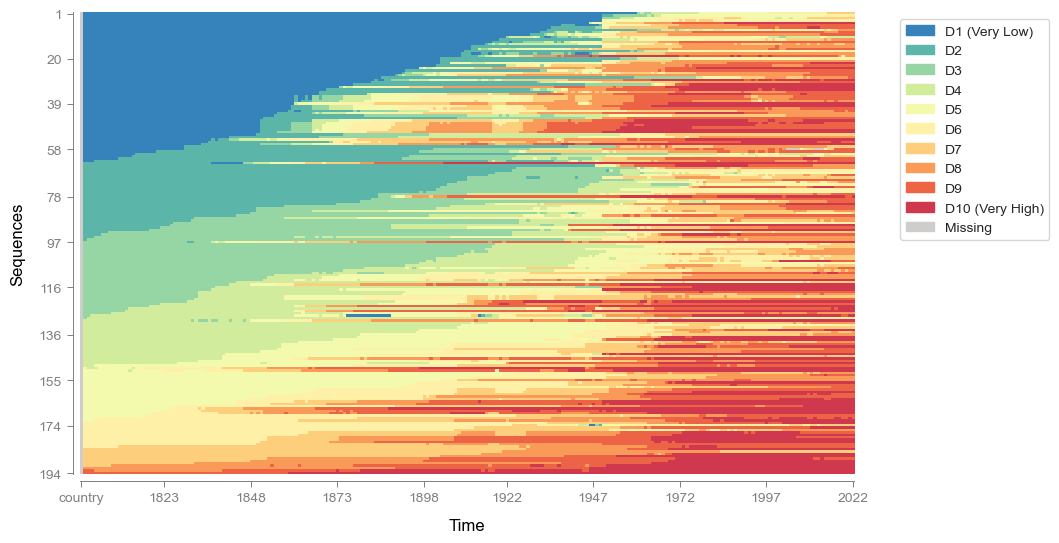

In [4]:
# Plot the index plot

plot_sequence_index(sequence_data, 
                    # save_as='index_plot'
                    )

But what if we would like to know more? state distribution plot. 

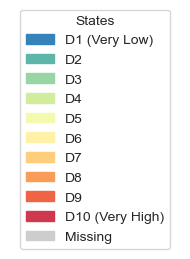

In [5]:
sequence_data.plot_legend(
                        # save_as="legend_plot"
                        )

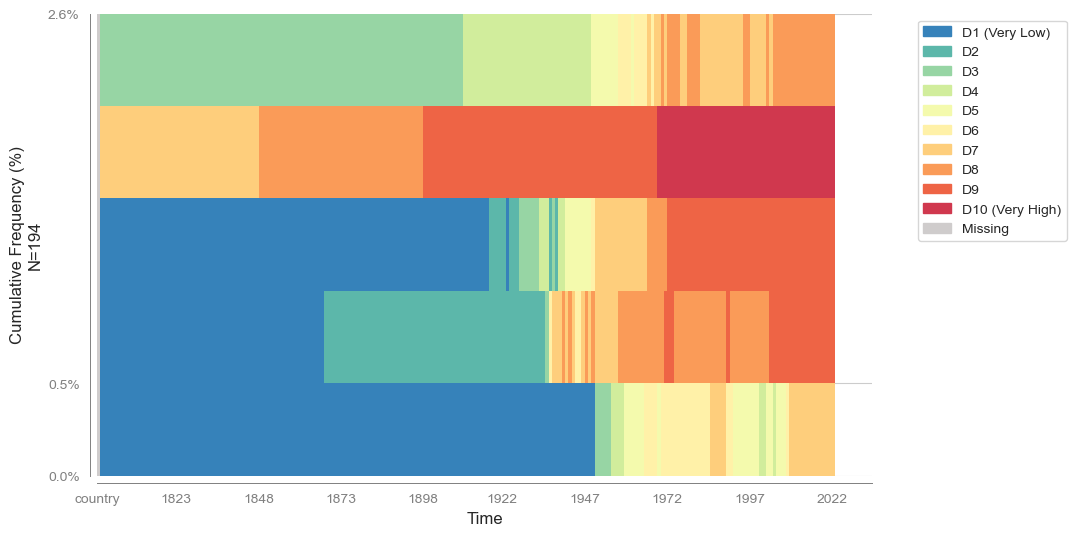

In [6]:
# Note: `plot_most_frequent_sequences` does not divide frequencies evenly; it’s just that in the CO2 dataset, the top-5 sequences happen to have similar frequencies.

plot_most_frequent_sequences(sequence_data, save_as='test', top_n=5)

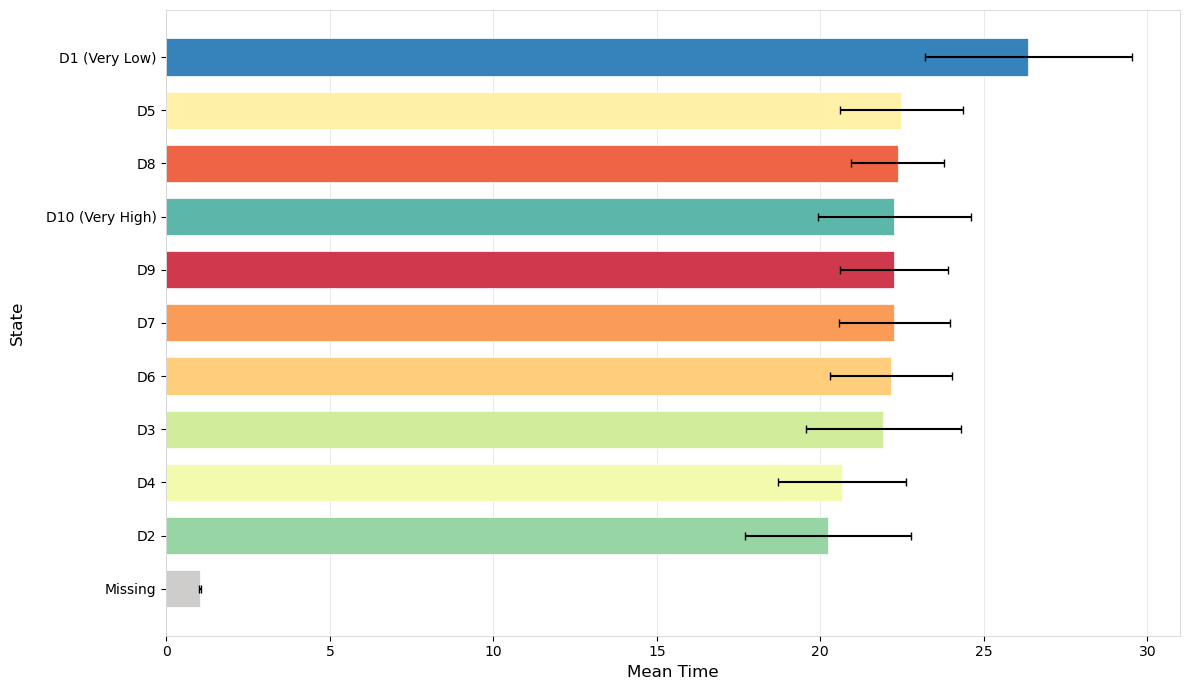

In [7]:
plot_mean_time(sequence_data, save_as='mean_time')

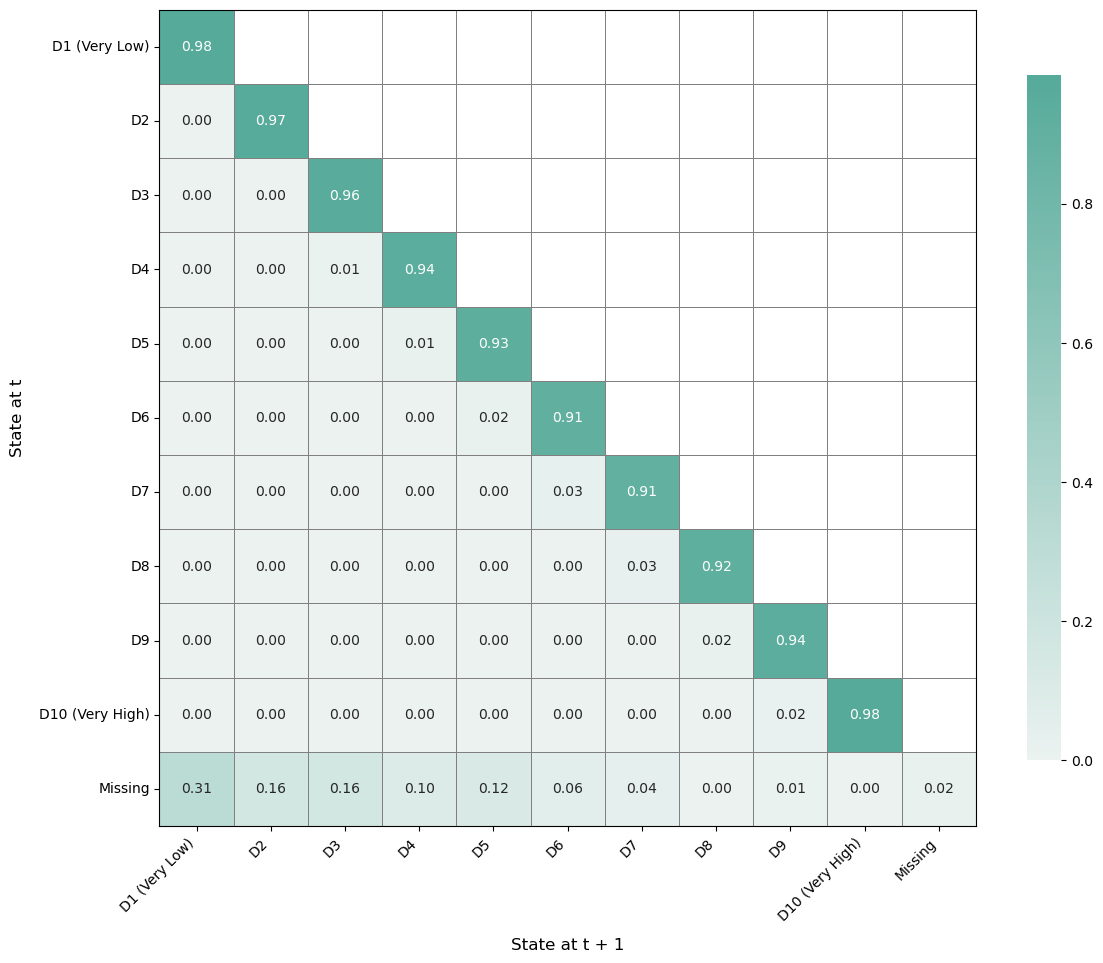

In [8]:
plot_transition_matrix(sequence_data, save_as='transition_matrix')


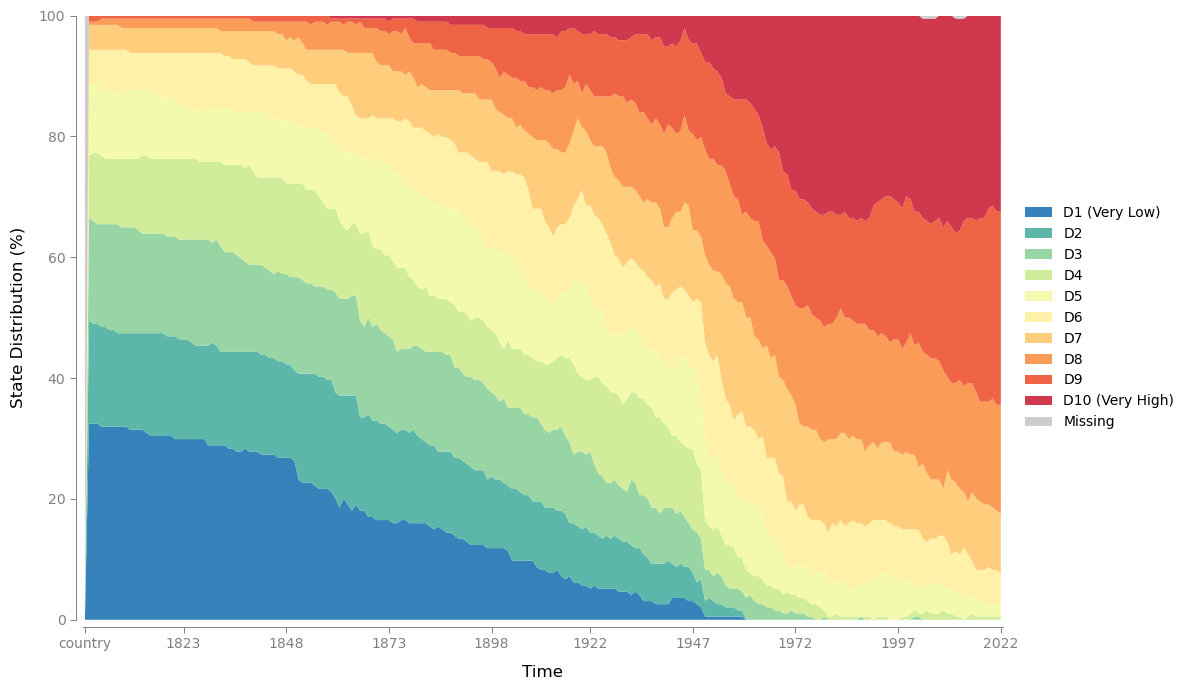

In [9]:
plot_state_distribution(sequence_data,
                        save_as='state_distribution')

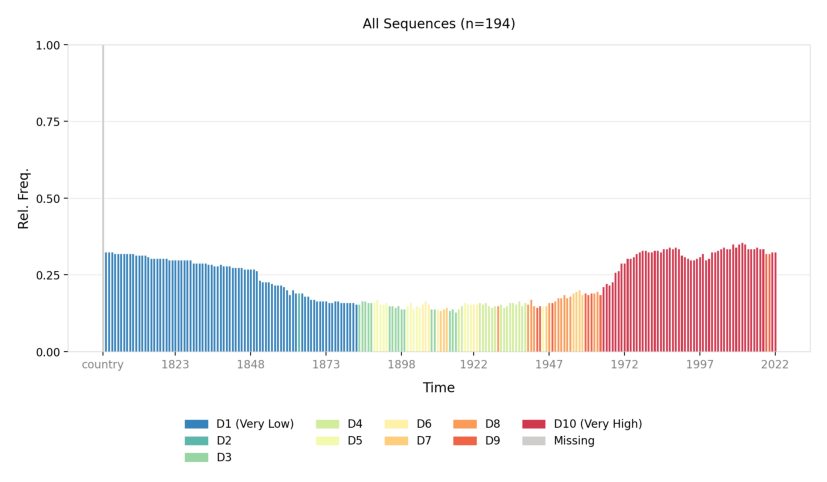

In [10]:
plot_modal_state(sequence_data, save_as='modal_state')

## Dissimilarity Measures

In [11]:
# You can also replace "OMspell" with "OM/DHD/HAM" and "TRATE" with "CONSTANT"
om = get_distance_matrix(seqdata=sequence_data,
                         method="OM",
                         sm="TRATE",
                         indel="auto")
om

[>] Processing 194 sequences with 11 unique states.
[>] Transition-based substitution-cost matrix (TRATE) initiated...
  - Computing transition probabilities for: [D1 (Very Low), D2, D3, D4, D5, D6, D7, D8, D9, D10 (Very High), Missing]
[>] generated an indel of type number

[>] Identified 194 unique sequences.
[>] Starting Optimal Matching(OM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Afghanistan,0.000000,272.363879,141.530885,405.839693,357.116339,352.452702,369.202821,199.747566,363.605396,367.308098,...,356.188303,251.681276,391.564474,253.570661,333.417093,193.512323,339.495876,337.004372,405.784131,389.419165
Albania,272.363879,0.000000,196.640891,293.042386,360.848766,357.623372,291.258820,190.293293,330.065835,318.787795,...,301.974406,207.816080,269.205424,205.916577,385.871215,217.202167,355.905637,150.343476,331.733788,324.072412
Algeria,141.530885,196.640891,0.000000,299.876169,360.346243,329.826237,297.445339,131.698913,285.521108,291.201892,...,386.745755,173.060640,276.896587,145.923477,361.337985,75.716405,348.517376,309.997189,397.970384,368.047516
Andorra,405.839693,293.042386,299.876169,0.000000,356.053656,317.797407,119.351333,288.455080,161.034886,143.550606,...,442.272407,231.894801,323.007193,256.673631,337.870059,320.299300,305.637267,338.668802,248.972441,316.165089
Angola,357.116339,360.848766,360.346243,356.053656,0.000000,291.024809,338.252215,304.404207,333.524614,343.035738,...,299.756320,323.190476,213.309453,329.042700,223.247060,388.304116,126.257652,324.332208,355.987397,347.278292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,193.512323,217.202167,75.716405,320.299300,388.304116,332.208197,314.154419,167.770756,307.697612,294.576219,...,407.898441,178.451252,299.052292,159.381580,393.463182,0.000000,386.746863,338.328445,409.781349,363.126942
Vietnam,339.495876,355.905637,348.517376,305.637267,126.257652,277.169745,281.862722,262.901696,284.480681,296.840967,...,250.273278,313.199712,224.199999,317.111338,171.558720,386.746863,0.000000,332.362799,311.052135,313.268987
Yemen,337.004372,150.343476,309.997189,338.668802,324.332208,402.822666,338.626193,287.908848,368.726059,362.779293,...,210.976531,287.655467,289.098219,284.491015,338.798635,338.328445,332.362799,0.000000,323.373702,353.783341
Zambia,405.784131,331.733788,397.970384,248.972441,355.987397,400.131845,247.433419,362.309280,364.953012,359.363387,...,442.218057,373.720811,406.480220,371.778073,255.268940,409.781349,311.052135,323.373702,0.000000,304.666582


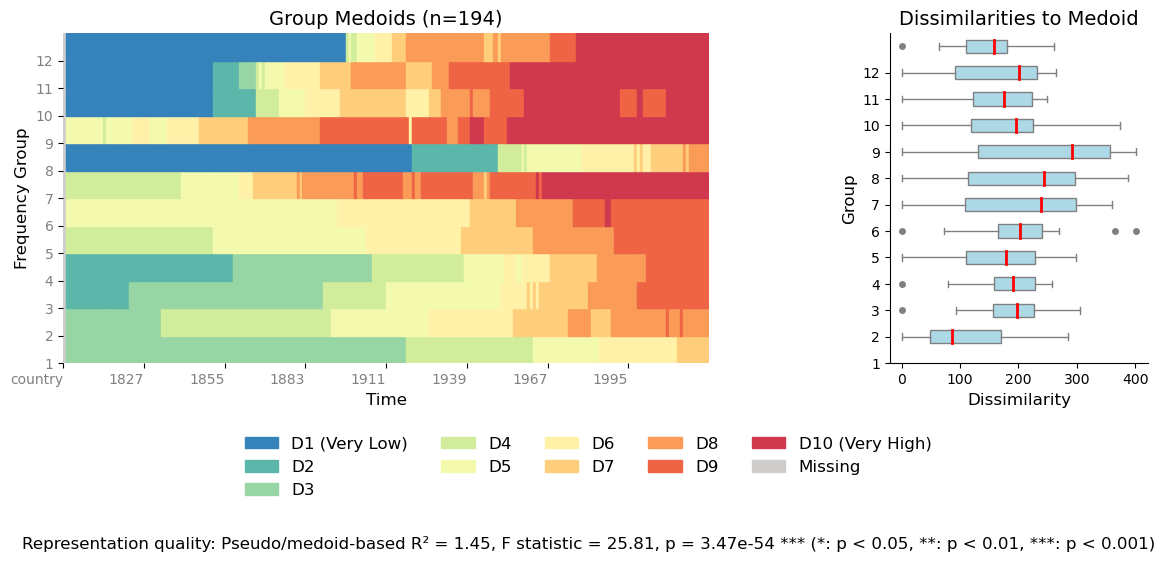

In [12]:
plot_relative_frequency(seqdata=sequence_data, 
                        distance_matrix=om, 
                        num_groups=12, 
                        dpi=200, 
                        # save_as='relative_frequency_plot'
                        )

## Cluster Analysis

[>] Converting DataFrame to NumPy array...


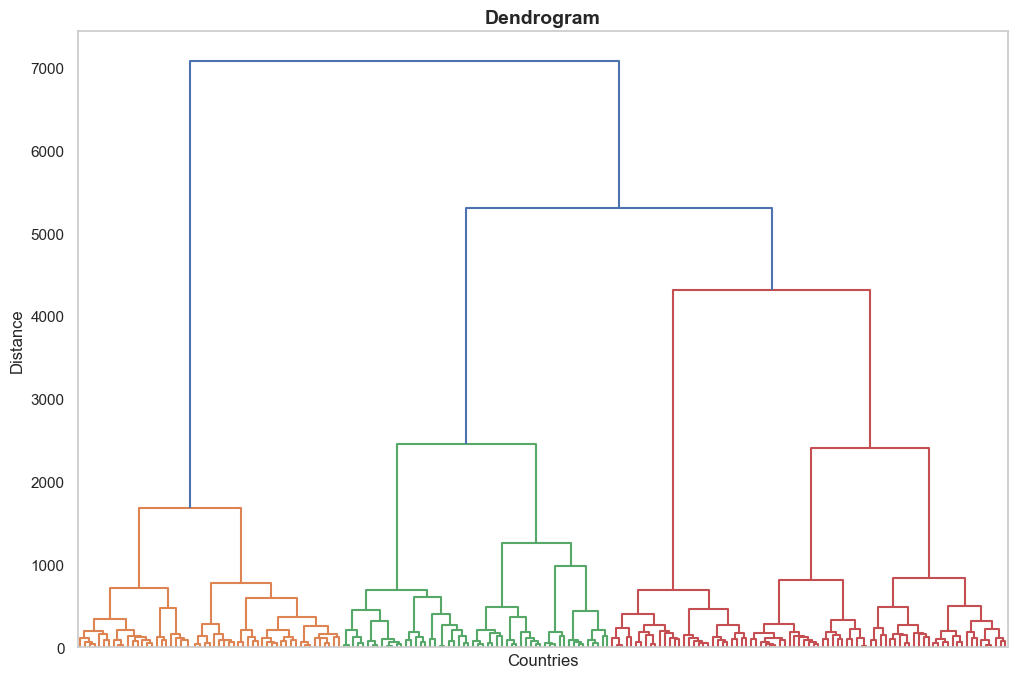

In [13]:
cluster = Cluster(om, sequence_data.ids, clustering_method='ward_d')
cluster.plot_dendrogram(xlabel="Countries", ylabel="Distance")

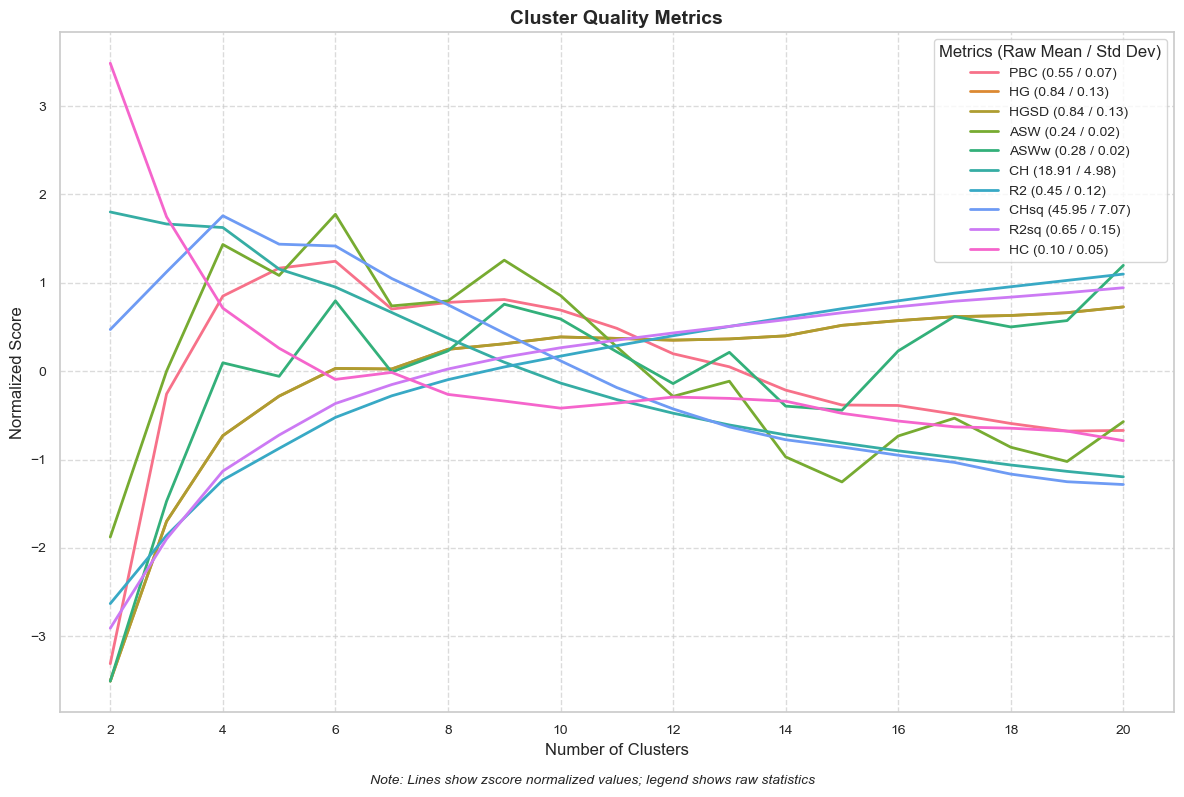

  Metric  Opt. Clusters  Raw Value  Z-Score Norm.
0    PBC              6   0.627588       1.243827
1     HG             20   0.940181       0.727274
2   HGSD             20   0.940181       0.727275
3    ASW              6   0.279138       1.775316
4   ASWw             20   0.309487       1.198081
5     CH              2  27.880967       1.801469
6     R2             20   0.585761       1.098985
7   CHsq              4  58.377313       1.758527
8   R2sq             20   0.801087       0.944432
9     HC              2   0.273554       3.484823


In [14]:
# Create a ClusterQuality object to evaluate clustering quality
cluster_quality = ClusterQuality(cluster)
cluster_quality.compute_cluster_quality_scores()
cluster_quality.plot_cqi_scores(norm='zscore', save_as='combined_scores')
summary_table = cluster_quality.get_cqi_table()
print(summary_table)

       Entity ID  Cluster
0    Afghanistan        1
1        Albania        1
2        Algeria        1
3        Andorra        2
4         Angola        5
..           ...      ...
189    Venezuela        1
190      Vietnam        5
191        Yemen        4
192       Zambia        3
193     Zimbabwe        3

[194 rows x 2 columns]
   Cluster  Count  Percentage
0        1     55       28.35
1        2     27       13.92
2        3     29       14.95
3        4     29       14.95
4        5     54       27.84


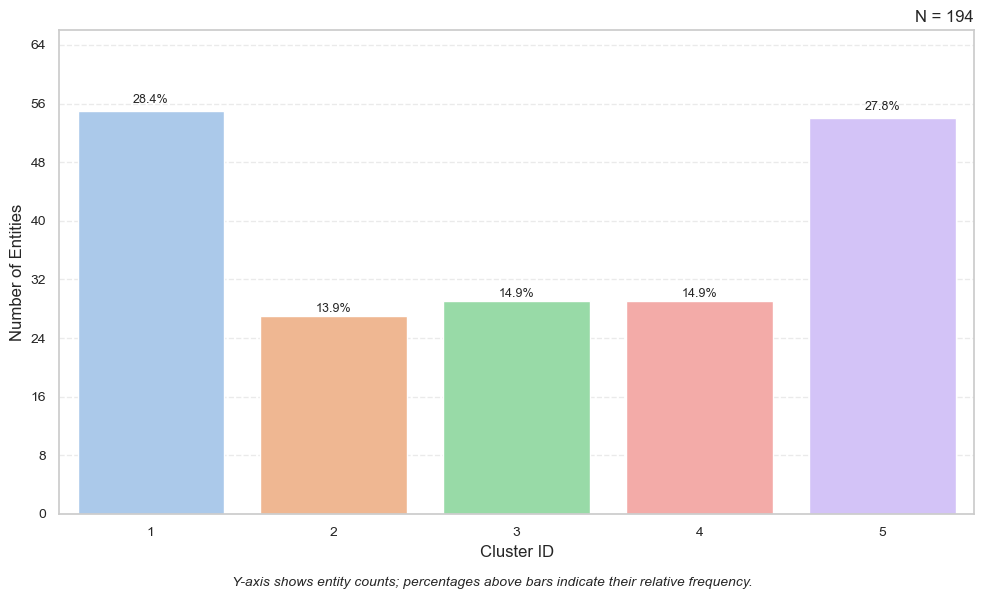

In [15]:
cluster_results = ClusterResults(cluster)
membership_table = cluster_results.get_cluster_memberships(num_clusters=5)
print(membership_table)
distribution = cluster_results.get_cluster_distribution(num_clusters=5)
print(distribution)
cluster_results.plot_cluster_distribution(num_clusters=5, save_as="distribution.png", title=None)


We summarize the characteristics of the five clusters as follows:

Cluster 1: **Stable High** – Maintained medium-to-high emission levels (D5–D7) for more than two centuries, and in the most recent 50 years shifted further toward the highest emission levels (D8–D10).

Cluster 2: **Steep Growth** – CO₂ emissions remained very low (D1) throughout the 19th century, but starting in the 20th century experienced a sudden and substantial increase (D6–D10), with nearly all reaching the highest emission levels (D9–D10) in the last two decades.

Cluster 3: **Steady Growth** – CO₂ emissions rose steadily and significantly over time. Initial levels were slightly low (D3–D4), but increased sharply in the mid-20th century (D5–D6), and reached high levels (D7–D9) in the last 50 years.

Cluster 4: **Rapid Growth** – CO₂ emissions were relatively low (D2–D3) in the 19th century, but began rising rapidly in the 20th century, eventually reaching high levels (D6–D9).

Cluster 5: **Persistent Low** – CO₂ emissions consistently remained low (D1–D2) over more than two centuries, with only a slight increase (D5–D7) occurring in the 21st century.

In [16]:
cluster_labels = {
    1: 'Stable High',
    2: 'Steep Growth',
    3: 'Steady Growth',
    4: 'Rapid Growth',
    5: 'Persistent Low',
}

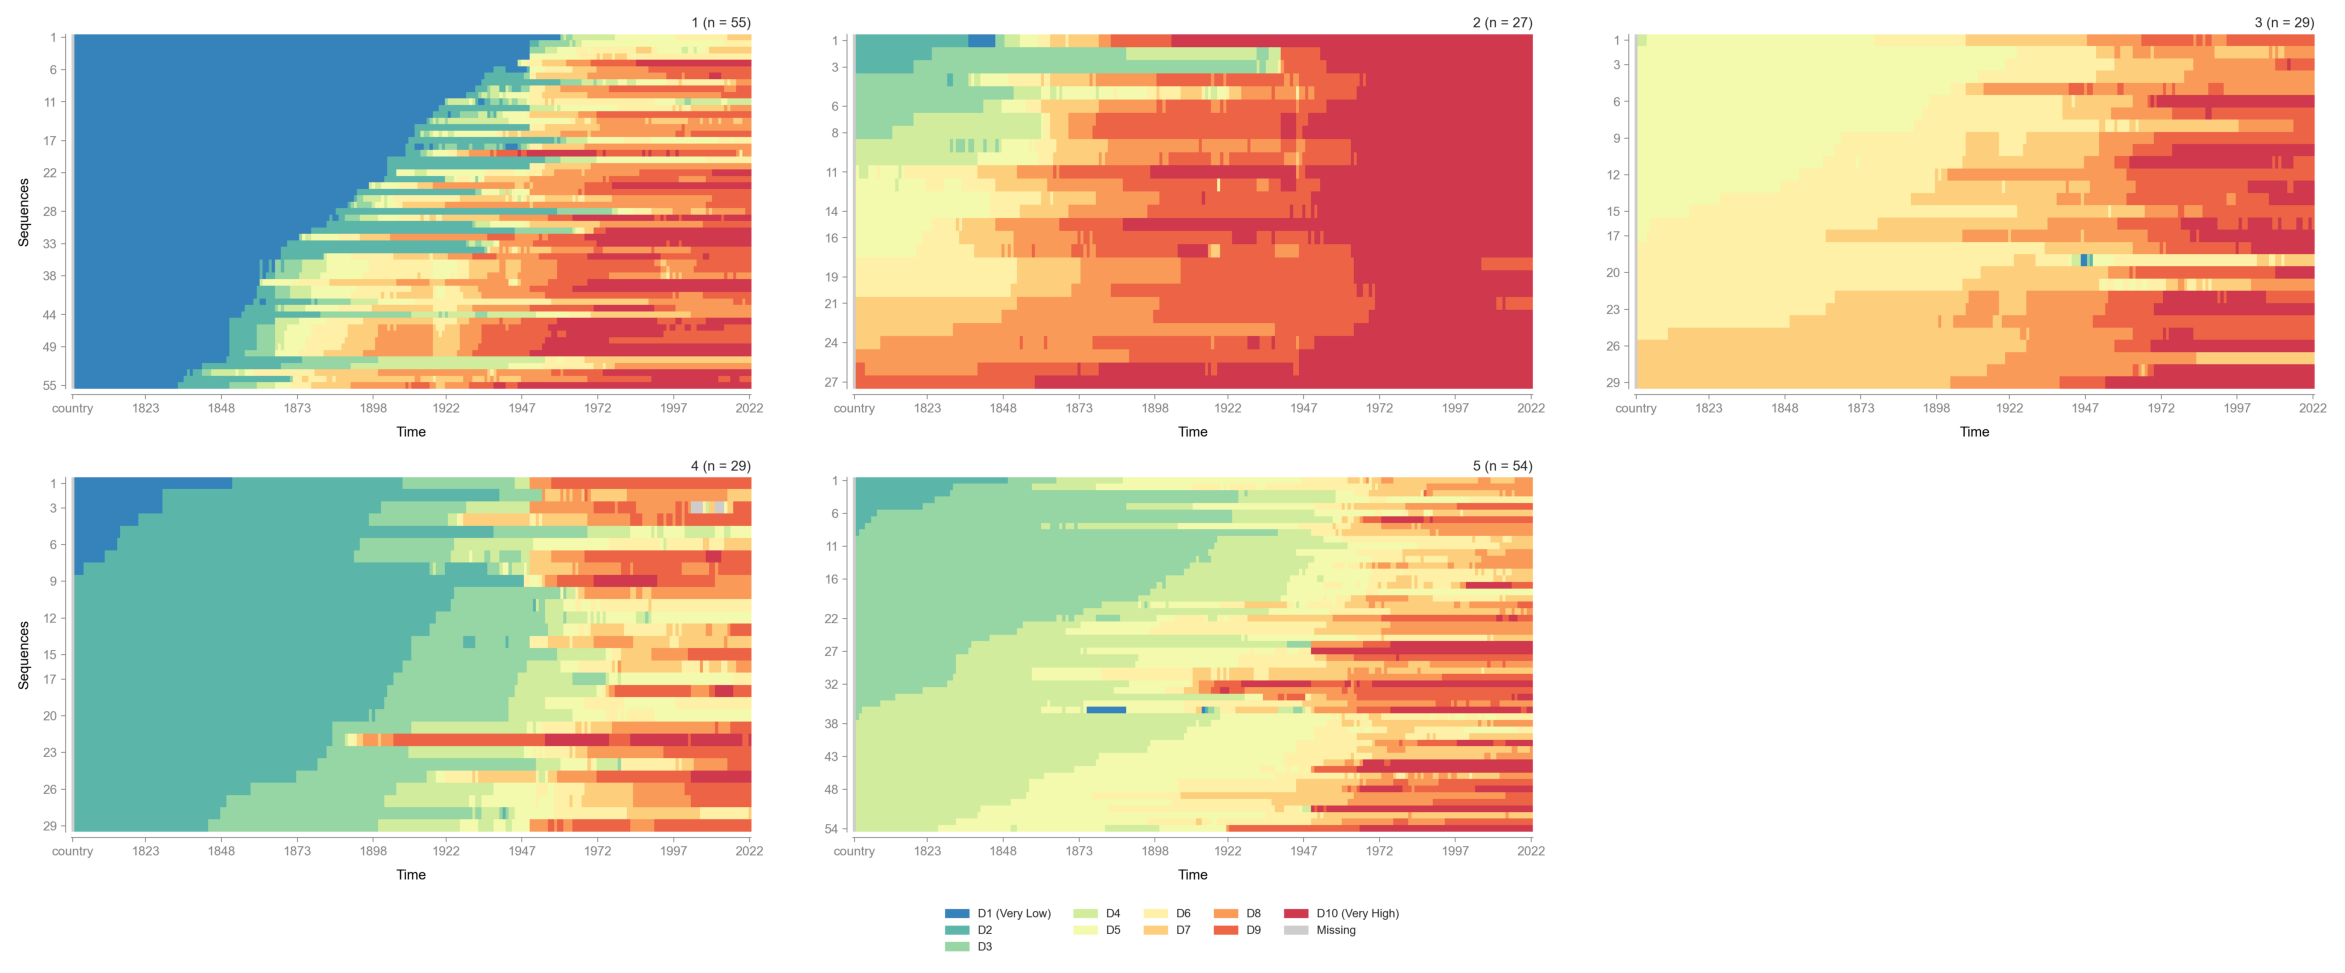

In [17]:
plot_sequence_index(seqdata=sequence_data,
                    group_dataframe=membership_table,
                    group_column_name="Cluster",
                    group_labels=cluster_labels,
                    )

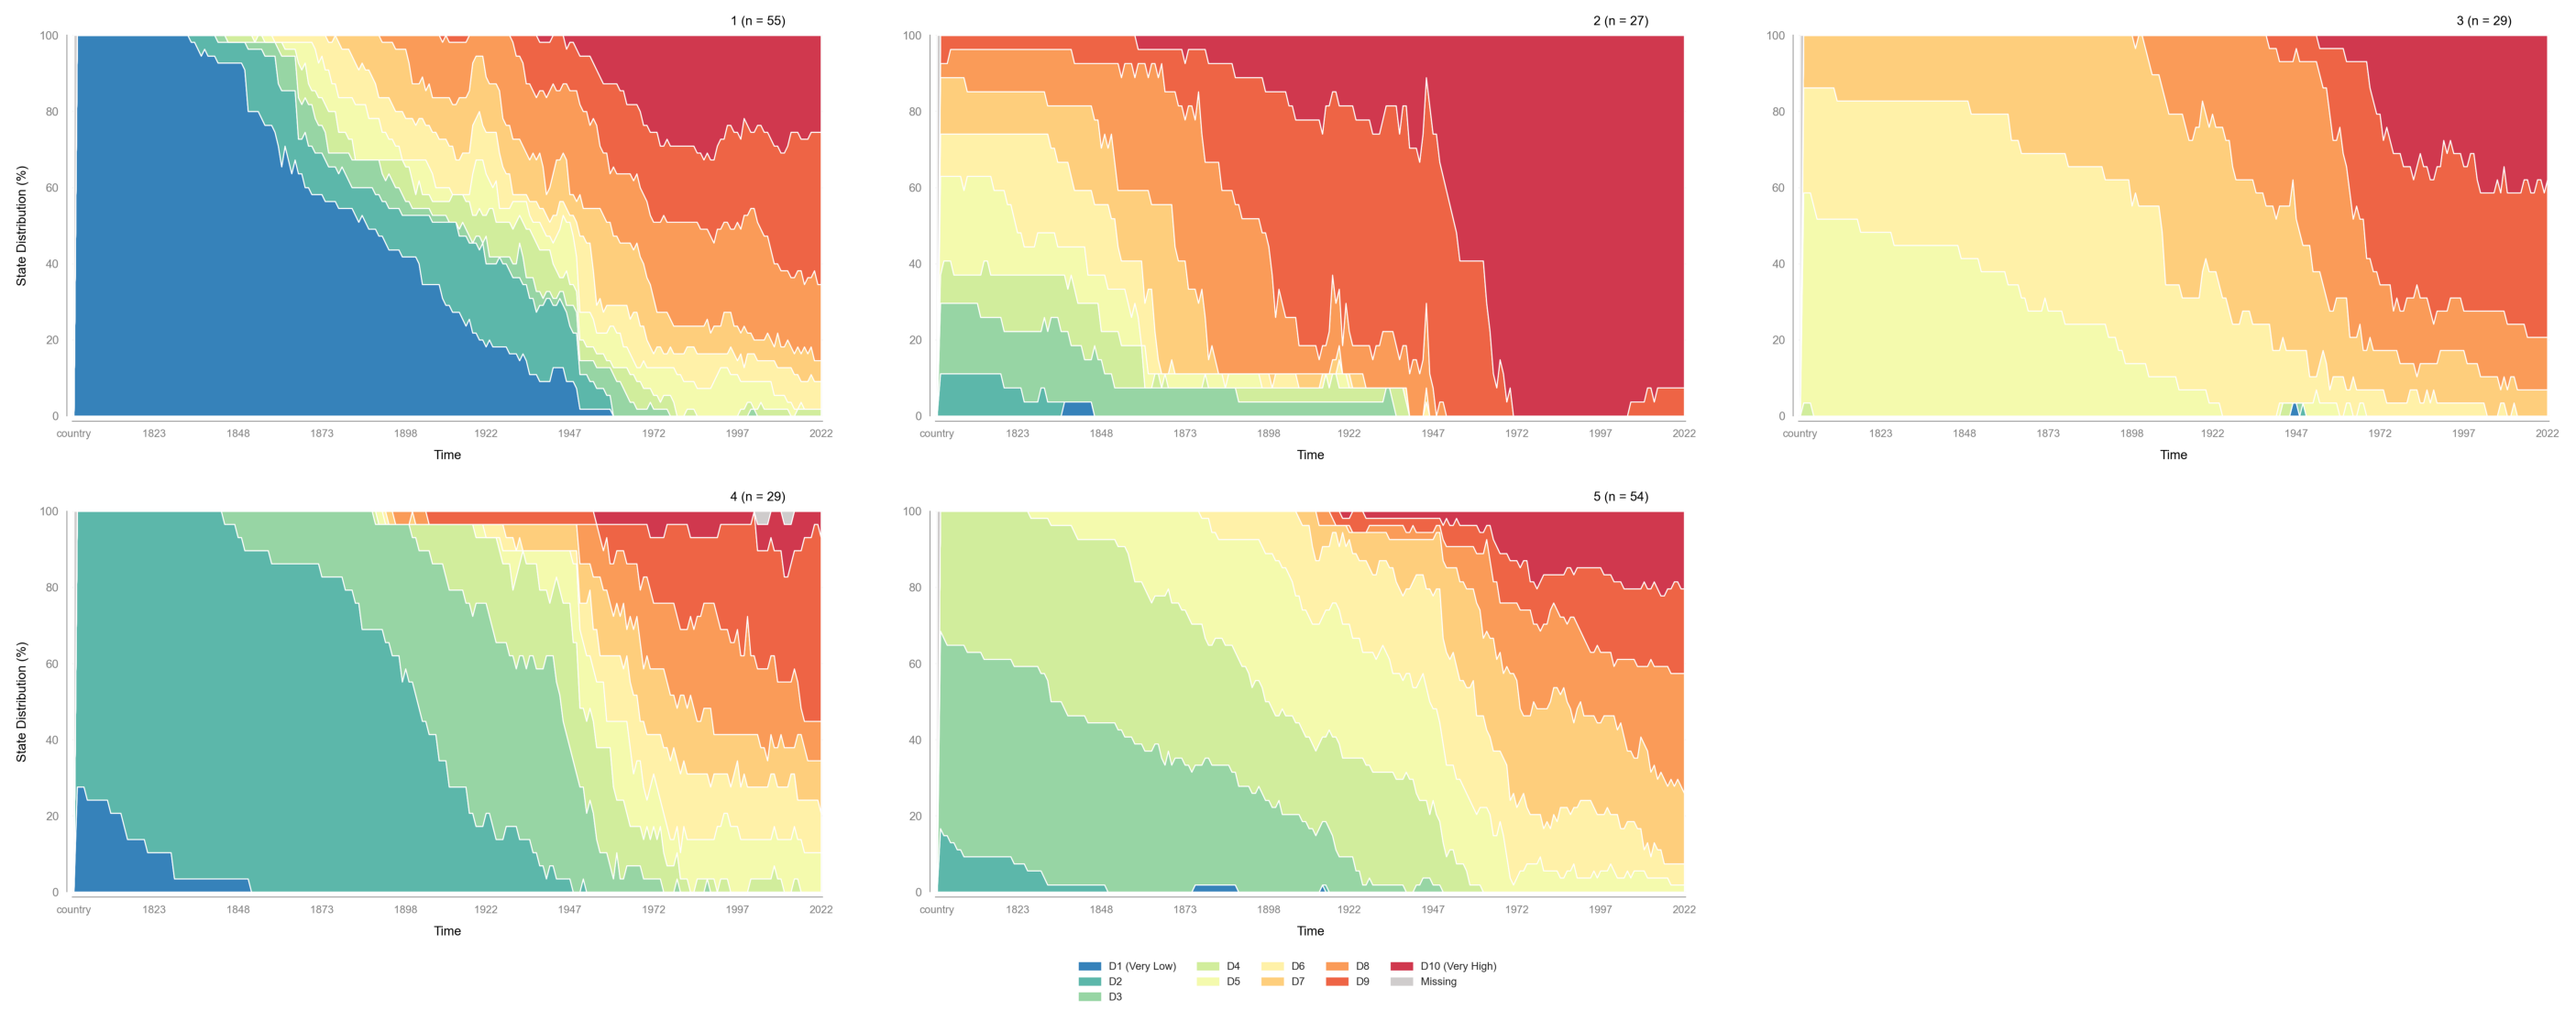

In [18]:
plot_state_distribution(seqdata=sequence_data,
                        group_dataframe=membership_table,
                        group_column_name="Cluster",
                        group_labels=cluster_labels,
                        # save_as='cluster_state_distribution_plot'
                        )

In [19]:
# Prepare the dataframe for regression analysis

membership_table.rename(columns={'Entity ID': 'country'}, inplace=True)

df_with_membership = pd.merge(df, membership_table, on='country', how='left')

# Add an additional column to the dataframe, i.e., the values of Cluster to the labels
df_with_membership['Cluster_labels'] = df_with_membership['Cluster'].map(cluster_labels)

df_with_membership

,Unnamed: 0,country,1800,1801,1802,1803,1804,1805,1806,1807,...,2015,2016,2017,2018,2019,2020,2021,2022,Cluster,Cluster_labels
0,0,Afghanistan,D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),...,D7,D7,D7,D7,D7,D7,D7,D7,1,Stable High
1,1,Albania,D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),...,D9,D9,D9,D9,D9,D9,D9,D9,1,Stable High
2,2,Algeria,D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),...,D9,D9,D9,D9,D9,D9,D9,D9,1,Stable High
3,3,Andorra,D7,D7,D7,D7,D7,D7,D7,D7,...,D10 (Very High),D10 (Very High),D10 (Very High),D10 (Very High),D10 (Very High),D10 (Very High),D10 (Very High),D10 (Very High),2,Steep Growth
4,4,Angola,D3,D3,D3,D3,D3,D3,D3,D3,...,D8,D8,D8,D8,D8,D8,D8,D8,5,Persistent Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,189,Venezuela,D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),...,D9,D9,D9,D8,D6,D8,D8,D8,1,Stable High
190,190,Vietnam,D3,D3,D3,D3,D3,D3,D3,D3,...,D8,D8,D8,D9,D9,D9,D9,D9,5,Persistent Low
191,191,Yemen,D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),...,D7,D7,D7,D7,D7,D7,D7,D7,4,Rapid Growth
192,192,Zambia,D7,D7,D7,D7,D7,D7,D7,D7,...,D7,D7,D7,D7,D7,D7,D7,D7,3,Steady Growth


## Regression

## Conclusions